## 4.4 감성분석

감성분석은 텍스트에 나타난 긍정, 부정요소를 정량화하는 작업으로 다음과 같은 일들을 수행한다.
* 긍정과 부정의 대상이 되는 단어 또는 개체 추출
* 추출된 단어 속에 나타난 의견, 평가, 태도 등의 특징적 양상을 정량화된 자료로 제시
* 감성분석의 목적은 텍스트간 비교 우위를 밝혀 상대적 비교를 하는 것에 있음
  
감성 분석의 종류는 크게 `사전 기반 감성 분석`, `지도 기계학습기반 감성 분석` 두 가지로 나뉜다.

### 4.4.1 사전 기반 감성 분석

감성 사전을 이용하여 텍스트에 담긴 감성을 분석한다. 감성 사전은 단어와 감성지표(긍정, 부정 정도)를 대응시켜놓은 자료이다. 사전 기반 분석에서는 감성 사전의 이용이 필수적이다.
  
< 자주 쓰이는 감성 사전(영어) >
* `AFINN` : Finn Arup Nielsen이 2009 ~ 2011년에 직접 수집한 감성 어휘들에 대해 -5~+5의 점수를 부여한 사전. 2477개의 감성어가 수록되어있다.
* `EmoLex` : 단어들을 긍정, 부정뿐만 아니라 공포, 기대, 신뢰, 놀람, 슬픔, 기쁨, 역겨움과 같은 8가지 감정으로 분류함. 인간의 정서 정보를 더욱 풍부하게 반영한다. 14,182개의 감성어를 보유하고 있다.
* `Bing Liu lexicon` : 감성어들을 긍정, 부정으로만 분류하며 점수지표는 없음. 6800여개의 감성어가 있으며 지속적으로 업데이트 되고 있음.
* `SentiWordNet` : 단어들을 긍정, 부정, 중립으로 분류. 파이썬 NLTK패키지에 있어 사용이 간편함.
  
한국어 감성 분석의 경우 영어로 번역한 후 감성 분석을 수행하거나 한국어 감성 사전을 이용한다.

< 한국어 감성 사전 >
* `KOSAC` : 개발자의 동의를 얻어 사용 가능 http://word.snu.ac.kr/kosac/index.php
* `EmoLex` : 14,182개의 단어에 대해 영어 뿐만 아니라 한국어 포함 105개국 언어에 대한 감성 사전을 제공한다.

***

**<예제> 영화 리뷰 데이터 감성 분석**  
  
> <https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews>

영화 사이트인 IMDB의 리뷰데이터를 이용해서 감성 분석을 수행한다. 데이터는 위 링크에서 다운받을 수 있다. 해당 데이터는 5만건의 각 영화리뷰에 대해 긍정인지 부정인지 라벨링이 되어있다.  
  
우선 필요한 패키지들을 import 한다.

In [1]:
pip install Afinn

  Created wheel for Afinn: filename=afinn-0.1-py3-none-any.whl size=53455 sha256=7aab32eb33c696300324efe6971fafe67796e85a63b42e3f4aa5e2338c12d613
  Stored in directory: c:\users\multicampus\appdata\local\pip\cache\wheels\f6\6f\c3\b305c5107a17618f2938a067d5ffcbb556909d82398762089e
Successfully built Afinn
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from afinn import Afinn
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
review = pd.read_csv('/content/drive/My Drive/ssafy_특화프로젝트/TextMining-master/data/IMDB Dataset.csv', engine="python")
review.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***

**파일을 불러올 때 다음 세 가지 요소를 지키지 않았을 경우 오류가 발생했음.**
* 데이터의 경로 구분자에 \를 두개 사용하지 않고 하나만 사용했을 경우  
  ex) `'E:\text-mining\IMDB\IMDB-Dataset.csv'`
* 파일 이름에 확장자 `.csv`를 붙이지 않은 경우  
  ex) `pd.read_csv('E:\\text-mining\\IMDB\IMDB-Dataset', engine="python")`
* `read_csv()` 파라미터에 `engine="python"`을 넣지 않은 경우  
  ex) `pd.read_csv('E:\\text-mining\\IMDB\IMDB-Dataset.csv')`

***

**Afinn으로 감성분석하기**

In [ ]:
afinn = Afinn()
pos_review = review['review'][1]
neg_review = review['review'][3]
print(afinn.score(pos_review))
print(afinn.score(neg_review))

13.0
-8.0


Afinn 감성 사전을 이용한 감성 분석 결과이다. 긍정리뷰에 해당하는 두 번째 리뷰는 13점이고 부정리뷰에 해당하는 네 번째 리뷰는 -8점이 산출되었다. Afinn 감성 사전을 이용할 경우 라이브러리 자체가 텍스트를 전처리해주고 감성점수를 산출하므로 특별한 전처리 과정이 필요 없다.

***

**EmoLex로 감성분석하기**
  
EmoLex 감성 사전은 다음 링크에서 다운받을 수 있다. 논문, 다국어 감성사전 등을 포함한 자료라 파일은 100mb이나 영어 분석에 필요한 감성 사전은 2mb정도이다. 해당 사전의 파일 이름은 **NRC-Emotion-Lexicon-Wordlevel-v0.92** 이다. 버전에 따라 버전명은 달라질 수 있다.

>http://sentiment.nrc.ca/lexicons-for-research/ 에서 **THE SENTIMENT AND EMOTION LEXICONS** 클릭

필요한 패키지는 앞에서 import 했으므로 EmoLex 분석에 필요한 감성 사전을 먼저 로드한다. 

In [4]:
NRC = pd.read_csv("C:\Users\multicampus\PycharmProjects\s03p23a201\backend\ML\data\after_change2.txt",
                  engine="python", header=None, sep="\t")
NRC.head(20)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-4-10e398e9042f>, line 1)

NRC 감성사전은 등록된 14,182개의 각 단어들에 대해 `긍정, 부정 + 8가지의 감정` 총 10가지 척도에 대해 0 또는 1로 라벨링되어있다. 따라서 해당 사전은 약 14만 1820개의 행으로 이루어져 있다. 하나의 단어마다 10개씩의 행으로 이루어진 데이터인 셈이다.

In [ ]:
NRC = NRC[(NRC != 0).all(1)]
NRC.head(10)

,0,1,2
19,abacus,trust,1
23,abandon,fear,1
25,abandon,negative,1
27,abandon,sadness,1
30,abandoned,anger,1
33,abandoned,fear,1
35,abandoned,negative,1
37,abandoned,sadness,1
40,abandonment,anger,1
43,abandonment,fear,1


감성분석에 필요한 단어들은 1로 라벨링 되어있는 것들이므로 Dataframe.all() 메서드를 통해 유의미한 라벨들만 추출한다. all()의 파라미터로 0을 입력할 경우 위아래로 탐색하며 1을 입력할 경우 좌우로 탐색한다.

In [ ]:
# 인덱스 번호 리셋
NRC = NRC.reset_index(drop=True)
NRC.head(10)

,0,1,2
0,abacus,trust,1
1,abandon,fear,1
2,abandon,negative,1
3,abandon,sadness,1
4,abandoned,anger,1
5,abandoned,fear,1
6,abandoned,negative,1
7,abandoned,sadness,1
8,abandonment,anger,1
9,abandonment,fear,1


In [ ]:
 import nltk
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

positive        14
trust            4
anticipation     3
joy              2
fear             2
disgust          1
negative         1
surprise         1
sadness          1
dtype: int64 AxesSubplot(0.125,0.125;0.775x0.755) a wonderful little production. <br /><br />the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />the actors are extremely well chosen- michael sheen not only "has got all the polari" but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. a masterful production about one of the great master's of comedy and his life. <br /><br />the realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappear

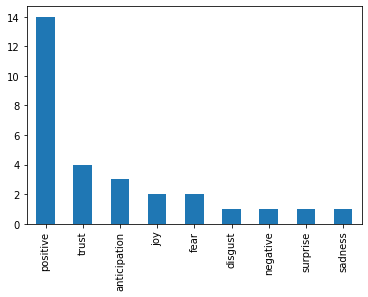

In [ ]:
tokenizer = RegexpTokenizer('[\w]+')
stop_words = stopwords.words('english')
p_stemmer = PorterStemmer()

raw = pos_review.lower()
tokens = tokenizer.tokenize(raw)
stopped_tokens = [i for i in tokens if not i in stop_words] # 불용어 제거
match_words = [x for x in stopped_tokens if x in list(NRC[0])] # 사전과 매칭

emotion=[]
for i in match_words:
    temp = list(NRC.iloc[np.where(NRC[0] == i)[0],1])
    for j in temp:
        emotion.append(j)

sentiment_result1 = pd.Series(emotion).value_counts()

print(sentiment_result1, sentiment_result1.plot.bar(), raw)

위는 긍정 리뷰에 대해 EmoLex 분석을 한 결과이다. 부정 리뷰에 대해서도 마찬가지 과정을 수행한다.

positive    1
dtype: int64 AxesSubplot(0.125,0.125;0.775x0.755)


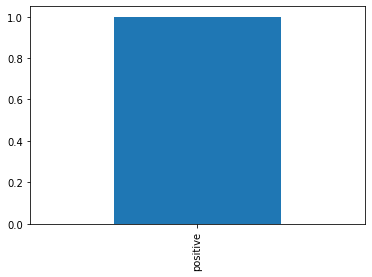

In [ ]:
raw = neg_review.lower()
raw = "It was a very interesting movie."
tokens = tokenizer.tokenize(raw)
stopped_tokens = [i for i in tokens if not i in stop_words] # 불용어 제거
match_words = [x for x in stopped_tokens if x in list(NRC[0])] # 사전과 매칭

emotion=[]
for i in match_words:
    temp = list(NRC.iloc[np.where(NRC[0] == i)[0],1])
    for j in temp:
        emotion.append(j)

sentiment_result2 = pd.Series(emotion).value_counts()

print(sentiment_result2, sentiment_result2.plot.bar())

### 4.4.2 지도 기계학습기반 감성 분석

머신러닝의 종류 중 하나인 지도학습(supervised learning)에 해당하는 기법들을 감성 분석에 적용하는 것을 말한다. 지도학습은 이미 라벨링이 완료된 훈련 데이터를 필요로 하며 주로 쓰이는 알고리즘은 다음과 같다.
* `서포트 벡터 머신`, `회귀 분석`, `신경망`, `나이브 베이즈 분류`, `의사결정나무`  
  
즉, 훈련 데이터를 통해 생성한 모델이 감성 사전의 역할을 하는 것이다.
  
감성 분석에 지도학습을 적용하려면 훈련 데이터와 테스트 데이터의 성격이 동일해야한다. 텍스트의 주제, 성격에 따라 유사한 어구라도 긍정 및 부정 여부가 달라질 수 있기 때문이다.

***

**<예제> 영화 리뷰 데이터 감성 분석**  
  
마찬가지로 IMDB 데이터를 이용한다. IMDB 리뷰 데이터는 긍정, 부정 라벨링이 완료된 데이터이므로 지도학습 기법을 적용하기에 최적화되어있다. 우선 필요한 패키지들을 import하고 리뷰 데이터를 로드한다.

In [ ]:
import pandas as pd
from afinn import Afinn
from nltk.corpus import stopwords
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

review = pd.read_csv('/content/drive/My Drive/ssafy_특화프로젝트/TextMining-master/data/IMDB Dataset.csv', engine="python")

x에는 feature, y에는 label을 설정하고 train data와 test data로 분할한다.

In [ ]:
x = review['review']
y = review['sentiment']

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    stratify=y,
                                                    test_size=0.2)

print(x_train.shape, x_test.shape) # 훈련세트, 테스트세트 비율 확인
np.unique(y_train, return_counts=True) # 훈련세트의 타깃(라벨) 확인

(40000,) (10000,)


(array(['negative', 'positive'], dtype=object), array([20000, 20000]))

훈련 데이터와 테스트 데이터가 4:1로 나뉘었다. 훈련 데이터 안에서 긍정리뷰와 부정리뷰는 정확히 절반씩이다.

In [ ]:
stop_words = stopwords.words('english')

# TF-IDF 가중치를 통해 문서-단어 매트릭스로 바꾸기
vect = TfidfVectorizer(stop_words=stop_words).fit(x_train)
x_train_vectorized = vect.transform(x_train)

x_train_vectorized

<40000x92709 sparse matrix of type '<class 'numpy.float64'>'
	with 3922678 stored elements in Compressed Sparse Row format>

불용어를 제거한 뒤 TF-IDF 가중치를 이용해 리뷰에 해당하는 column을 문서-단어 매트릭스로 바꾼다.

In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

model = LogisticRegression()
model.fit(x_train_vectorized, y_train)
print(model.score(x_train_vectorized, y_train))

0.9351


사이킷런으로 로지스틱 회귀를 수행한 결과 훈련데이터에서 93%의 정확도를 보였다.

In [ ]:
print(model.score(vect.transform(x_test), y_test))

0.8955


테스트 데이터에서는 89%이다.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train_vectorized, y_train)
print(clf.score(x_train_vectorized, y_train))

1.0


In [ ]:
test_score = float(model.predict)

의사결정나무로 훈련한 결과이다. 100%가 나와버렸다(?)

In [ ]:
print(clf.score(vect.transform(x_test), y_test))

0.7208


테스트셋에서 훈련데이터 만큼의 성능을 보여주지 못하는 것으로 보아 의사결정나무로 훈련시킨 모델은 과적합된 것으로 판단된다.

In [ ]:
def predict_sem(data):
  token = tokenizer(data)
  